# Forecasting Inflation Rate with Neural Network Model

Hyunwoo Lee, Shengyan Gao, Zhongjia Wang, 

## Introduction

  Inflation often refers to a rise in the overall level of prices of goods and services in an economy during a specific period. The main measure of price inflation is inflation rate, which is the percentage change in a price index over time.Inflation can have negative effects on economy. It may decrease in the purchasing power of the currency and widen the income gap. High or unpredictable inflation rates are regarded as harmful to overall economy because it adds inefficiencies for market and makes it difficult for companies to budget in a long term. Besides, inflation can impose hidden tax increases, as inflated earnings push residents towards higher income tax rates. Therefore, Controlling the inflation rate is one of the major tasks of the Governments and Central Banks and an accurate forecast of inflation rate is very crucial for the nation’s economy.
  
  Inflation is a key gauge of an economy’s health, however, predicting it can be arduous. To forecast the U.S. inflation is associated with economic stability and uncertainty in the future.Through study previous scholar's paper, we found that neural network model is a great technique to forecast future values based on past data. This paper aims to forecast U.S. inflation rate by using neural network. The model we are using can capture certain features of the underlying economic process and extrapolate their effects at later stages.

## Literature Review

We learned some methods used by other scholars to predict the inflation rate. Jackie D. Urrutia et al. (2021) used both Multiple Linear Regression and Recurrent Neural Network (RNN) and made a result comparison to determine which model could better forecast inflation rate from Dec 2018 to Dec 2023. In the study, they observed the Inflation Rate as dependent variable and some independent variables such as Import, Export, Money Supply, GDP, GNP, Expenditure and Exchange Rate from Jan 2007 to Nov 2018. The outcome showed money supply, GDP, GNP and Expenditures were found to have a notable relation to the Inflation Rate. And with the used of Multiple Linear Regression, only Money Supply and Expenditures are significant predictors in predicting the Inflation Rate of the Philippines. Also, the researchers found that RNN could give the least error under MSE and the NMSE, which indicated that RNN had higher forecasting accuracy.

M. Krishna Reddy et al. (2008) applied Backpropagation Network (BPN) and Recurrent Neural Network (RNN) to forecast inflation rate under static and dynamic forecasts respectively are used. They selected inflation rate as dependent variables. Money Supply, Industrial Production, CNX-NIFTY stock index (close value), Call Money Rates, and Exchange rate of Rupee per Dollar from July 1994 to March 2008 were selected as explanatory variables. 80% of the data is used as training set to estimate the models and the remaining 20% of the data is used as testing set for assessing the forecast performance based on out-of-sample forecasts. By comparing RMSE, MAE, and MAPE values of two models, they found that RNN model is performing better than BPN in forecasting inflation rate of India. 

Emi Nakamura (2004) used neural network (NN) model and univariate autoregression models in a pseudo- out-of-sample forecasting experiment. She evaluated the importance of standard practice NN estimation methods such as early stopping and pre-processing and compared MSE value of two models. She found that NN model performed well relative to AR models for horizons of one and two quarters. She also suggested that the early stopping procedure could contribute to the predictive success of the NN and should be adopted into other forecasting research involving NN. Since the high accuracy of RNN in predicting inflation by other scholars, in this article we use the RNN model to make prediction.

## Model

In modern age of forecasting, there has been a great interest in studying the NN forecasting in economics, financial, business, engineering applications including GDP growth, inflation rate, stock returns, currency in circulation, electricity demand, construction demand and exchange rates (Refenes and White, 1998; Bordoli, 2005). NN can approximate nonlinear systems for prediction purpose. Through NN one can model the relationships between one or several input (independent) variables and one or several output (dependent) variables. NN is a mathematical system that is comprised of a number of processing units, also known as neurons that are linked via weighted connections. A neuron is essentially an equation, which is often referred to as a transfer function. A neuron receives weighted signals from other neurons, sums them, transforms them using the transfer function and generates an output. Expected inflation has an important role in managing monetary policy. 

$H_{t0}=0$

$H_{t1}=ReLU⁡(W_xX_{t0}+B_x+W_hH_{t0}+B_h)$

$H_{t2}=ReLU⁡(W_xX_{t1}+B_x+W_hH_{t1}+B_h)$

$H_{t3}=ReLU(W_xX_{t2}+B_x+W_hH_{t2}+B_h)$

In [3]:
from IPython.display import Image

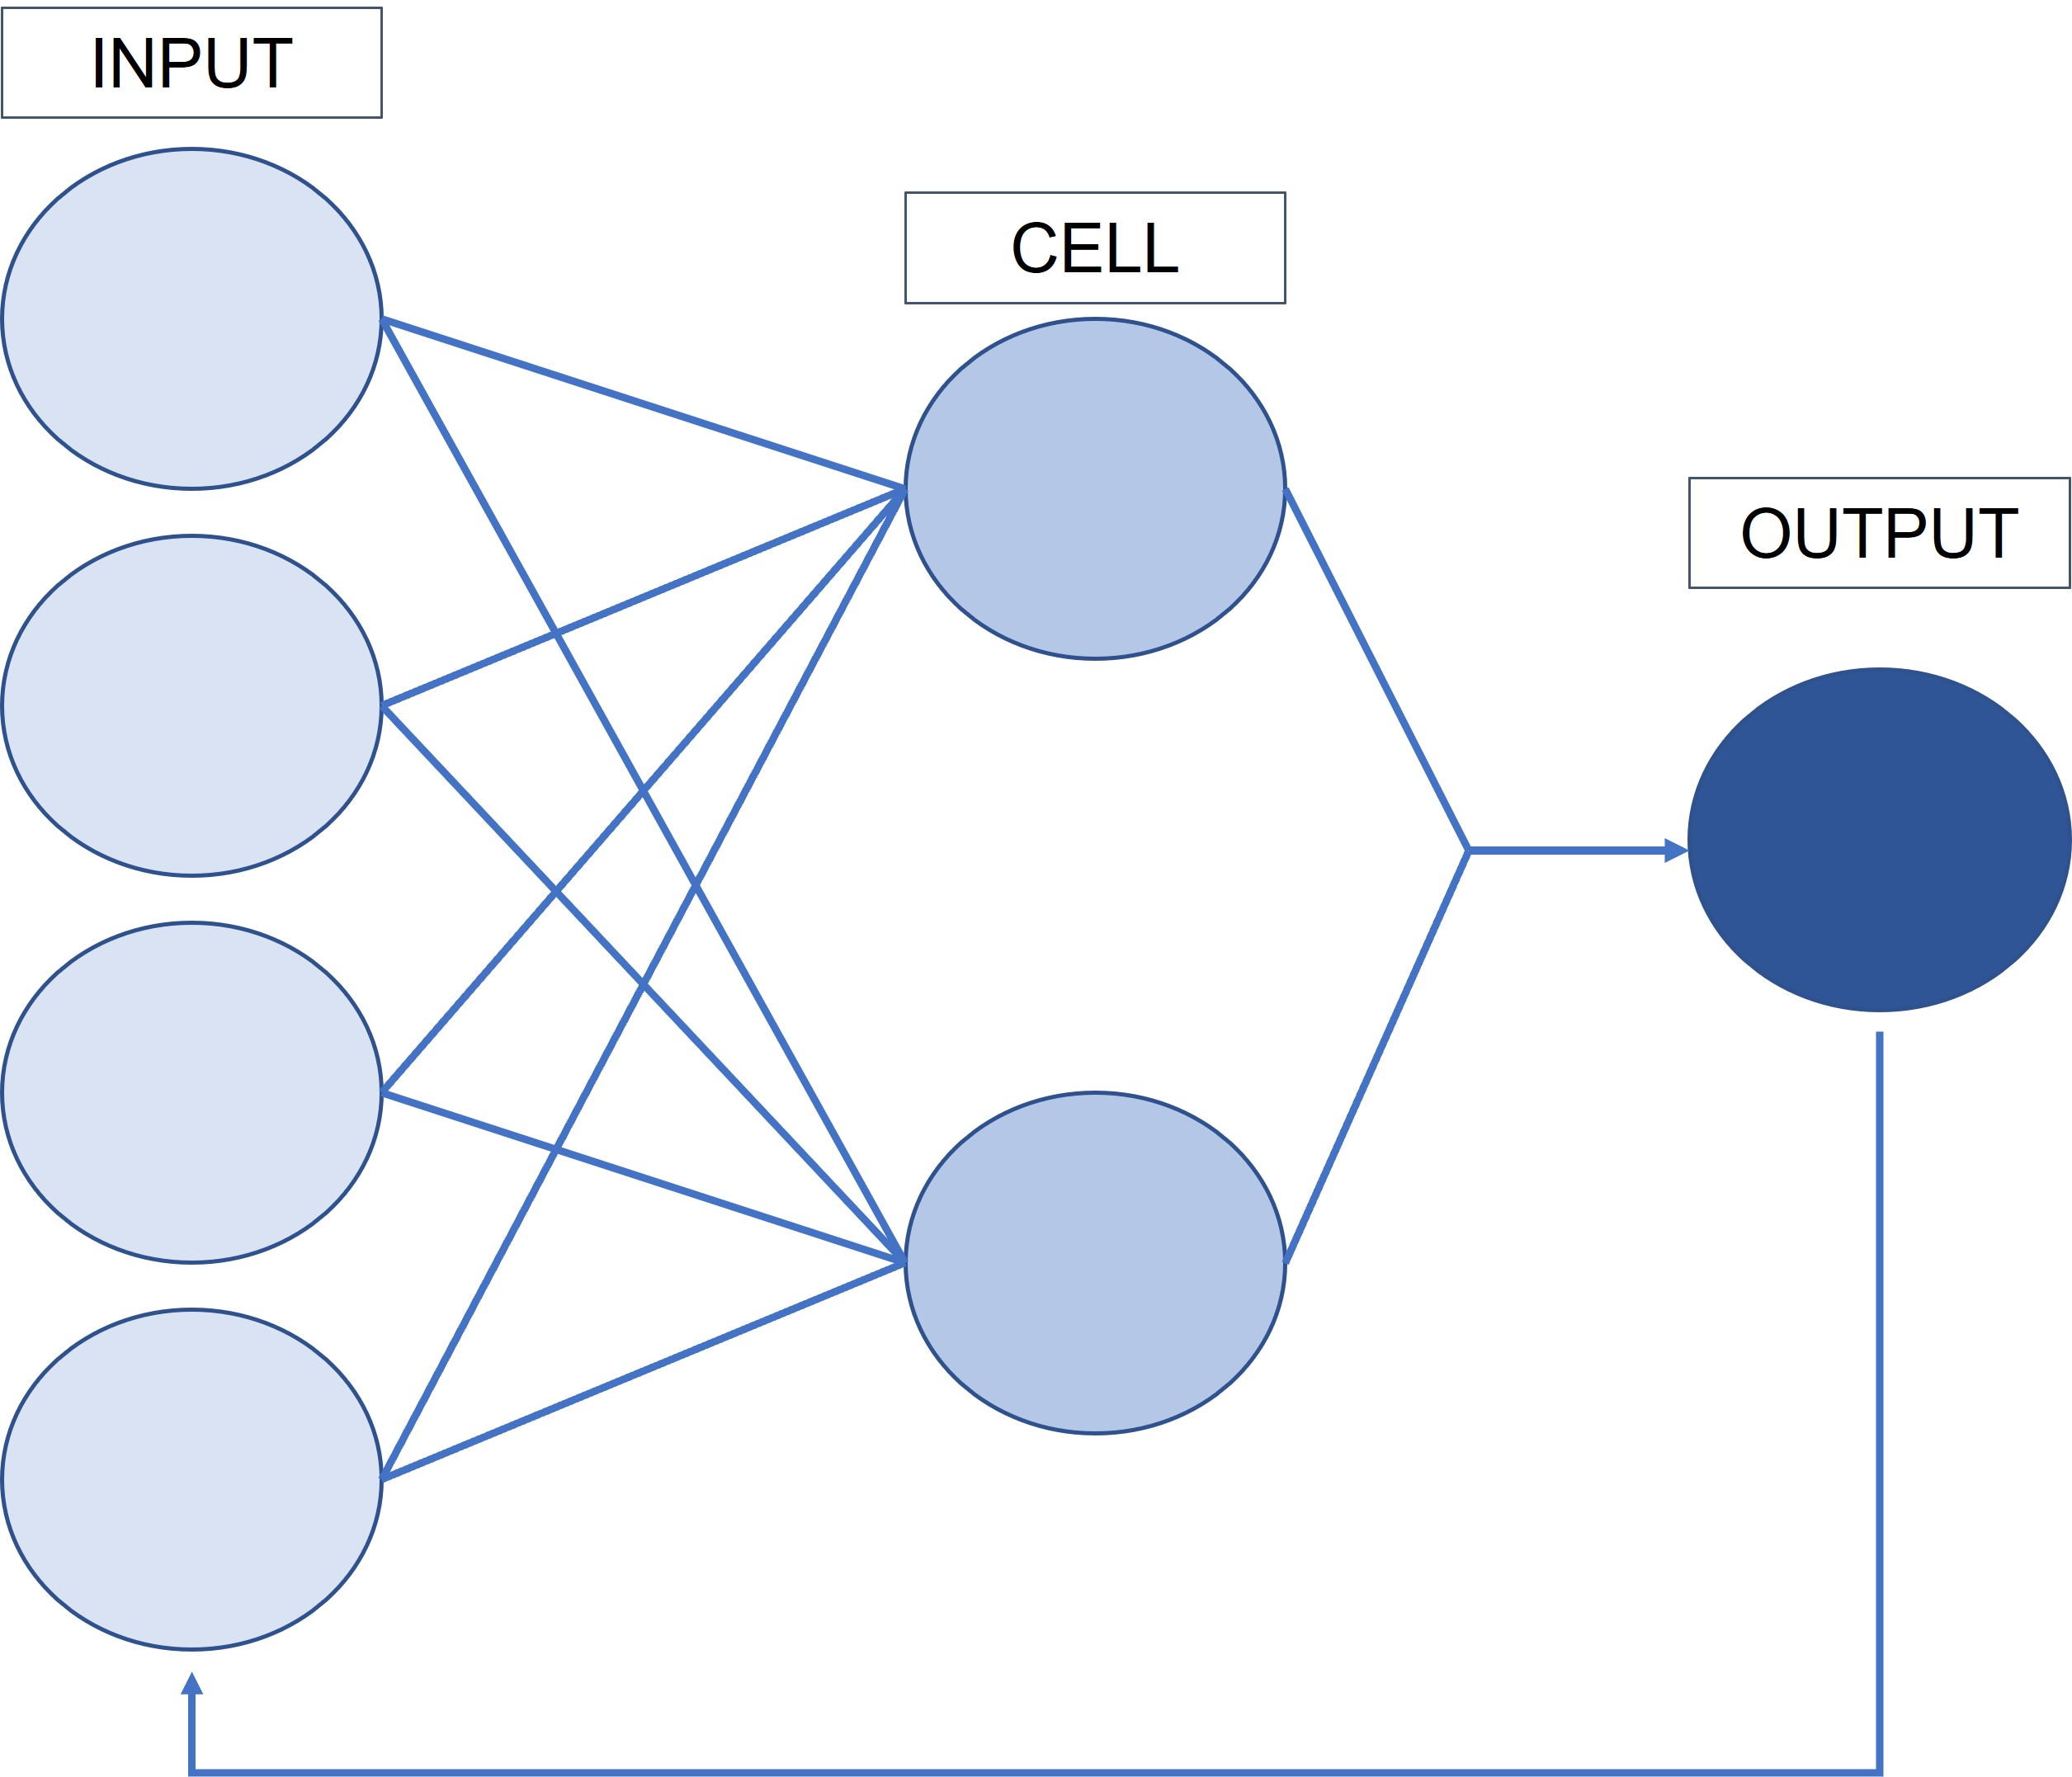

In [10]:
Image(r"C:\Users\lhwpo\Desktop\2022 spring\bigdata economics\project\final\image.jpg", width=500, height=500)

The input layer units at time (t +1) receive as input not only the input vectors for time (t +1), but also the final output vectors of time t. The new inputs, i.e., fed-back final output vectors are called state vectors. As in figure 2, the feedback weights connecting the final output vectors and the state vectors are fixed at 1, and the extra weights W that connect state vectors to the hidden units are initiated randomly and thereafter adjusted like all other weights in the network.

## Data 

In addition, we would like to emphasize that all data used in our paper are publicly available from Federal Reserve Economic Data. We are using montly data from Jan.1st 1994 through  Jan.1st 2022 including Federal Funds Rate(ffr), Unemployment rate(uem), M1 Supply(M1), M2 Supply(M2), 3 Year Montholy Treasury Bill Secondary Market Rate(t3m),  WTI Spot Crude Oil price(wti), Real Broad Effective Exchange Rate(reer), Producer Price Index by Commondities(ppi), Case-Shiller U.S. National Home Price Index(home), non-farm payroll(nonfarm) and Average Hourly Earnings of Production and Nonsupervisory Employees(hwage)



In [1]:
import pandas as pd #data manipulation
import numpy as np #data manipulation
from numpy import array
from numpy import hstack
from numpy.random import seed
seed(123)
import tensorflow as tf
import datetime
from datetime import datetime, timedelta
from sklearn import preprocessing #preprocessing
import math as math

In [2]:
import keras as keras #keras package for neural networks
from keras.models import Sequential
from keras.layers import Dense #dense layers
from keras.layers import LSTM #LSTM layers
from keras.layers import Dropout #Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping
import pydot as pyd
from IPython.display import SVG
from keras.utils.vis_utils import plot_model #plot network's structure
import matplotlib.pyplot as plt #plots
import time
from collections import Counter
import os
os.chdir('..')
import csv #save output
import math

Load the data from excel

In [3]:
data = pd.read_excel(r"C:\Users\lhwpo\Desktop\2022 spring\bigdata economics\project\data1.xlsx")

In [4]:
data

,date,inf,ffr,uem,m1,m2,t3m,wti,reer,ppi,home,nonfarm,hwage
0,1994-01-01,0.000000,3.050645,3.3,1131.6,3474.9,2.975500,15.00,105.20,119.100,78.199,112595,11.20
1,1994-02-01,0.273038,3.245000,3.2,1136.3,3475.7,3.253684,14.78,104.66,119.300,78.206,112781,11.25
2,1994-03-01,0.272294,3.335806,3.1,1140.1,3480.1,3.503043,14.66,104.78,119.700,78.351,113242,11.25
3,1994-04-01,0.067958,3.555000,2.9,1141.1,3481.3,3.678421,16.38,104.68,119.700,78.703,113586,11.27
4,1994-05-01,0.203597,4.010968,2.7,1143.3,3490.8,4.144762,17.88,103.78,119.900,79.210,113921,11.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,2021-09-01,0.410009,0.079333,2.5,19897.6,21045.7,0.041905,71.65,117.16,235.678,271.572,147328,26.26
333,2021-10-01,0.862744,0.079032,2.3,20064.9,21200.5,0.052000,81.48,118.10,240.465,273.824,148005,26.42
334,2021-11-01,0.696797,0.079667,2.1,20283.6,21407.2,0.051500,79.15,119.05,243.287,276.246,148652,26.55
335,2021-12-01,0.573527,0.079677,1.9,20439.5,21553.1,0.060000,71.71,119.89,241.327,278.696,149240,26.74


In [5]:
data.index=data['date']
data = data.dropna()
data=data.drop(columns=["date"])

Non-farm payroll is excluded after conducting codes below to prevent overfitting problems

In [6]:
data=data.drop(columns=["nonfarm"])

In [7]:
data

,inf,ffr,uem,m1,m2,t3m,wti,reer,ppi,home,hwage
date,,,,,,,,,,,
1994-01-01,0.000000,3.050645,3.3,1131.6,3474.9,2.975500,15.00,105.20,119.100,78.199,11.20
1994-02-01,0.273038,3.245000,3.2,1136.3,3475.7,3.253684,14.78,104.66,119.300,78.206,11.25
1994-03-01,0.272294,3.335806,3.1,1140.1,3480.1,3.503043,14.66,104.78,119.700,78.351,11.25
1994-04-01,0.067958,3.555000,2.9,1141.1,3481.3,3.678421,16.38,104.68,119.700,78.703,11.27
1994-05-01,0.203597,4.010968,2.7,1143.3,3490.8,4.144762,17.88,103.78,119.900,79.210,11.29
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,0.410009,0.079333,2.5,19897.6,21045.7,0.041905,71.65,117.16,235.678,271.572,26.26
2021-10-01,0.862744,0.079032,2.3,20064.9,21200.5,0.052000,81.48,118.10,240.465,273.824,26.42
2021-11-01,0.696797,0.079667,2.1,20283.6,21407.2,0.051500,79.15,119.05,243.287,276.246,26.55


**all data scaled by using Min-Max method**

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data1 = scaler.fit_transform(data)

In [9]:
data=pd.DataFrame(data=data1, index=data.index, columns=data.columns)

In [10]:
data

,inf,ffr,uem,m1,m2,t3m,wti,reer,ppi,home,hwage
date,,,,,,,,,,,
1994-01-01,0.566419,0.462110,0.153846,0.003470,0.000000,0.481143,0.030330,0.337597,0.000000,0.000000,0.000000
1994-02-01,0.652991,0.492032,0.145299,0.003710,0.000044,0.526300,0.028536,0.322581,0.001573,0.000034,0.003191
1994-03-01,0.652756,0.506012,0.136752,0.003905,0.000285,0.566777,0.027558,0.325918,0.004719,0.000746,0.003191
1994-04-01,0.587967,0.539757,0.119658,0.003956,0.000351,0.595245,0.041582,0.323137,0.004719,0.002475,0.004467
1994-05-01,0.630974,0.609954,0.102564,0.004068,0.000871,0.670944,0.053812,0.298109,0.006292,0.004964,0.005743
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,0.696421,0.004670,0.085470,0.963824,0.962573,0.004947,0.492214,0.670189,0.916890,0.949527,0.961072
2021-10-01,0.839970,0.004624,0.068376,0.972386,0.971053,0.006586,0.572360,0.696329,0.954540,0.960585,0.971283
2021-11-01,0.787353,0.004721,0.051282,0.983578,0.982376,0.006505,0.553363,0.722747,0.976735,0.972478,0.979579


In [11]:
data.shape

(337, 11)

plot the data

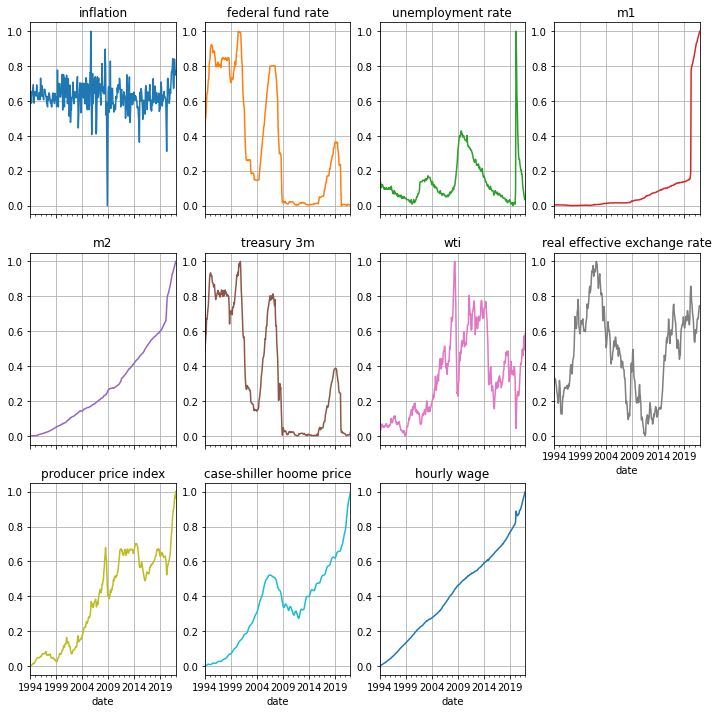

In [16]:
data.plot(kind ='line',
            subplots = True,
            grid = True,
            figsize = (12,12),
            title = ['inflation','federal fund rate', 'unemployment rate', 'm1', 'm2', 'treasury 3m', 'wti', 
                     'real effective exchange rate', 'producer price index', 'case-shiller hoome price','hourly wage'],
            layout = (3,4),
            sharex = True,
            sharey = False,
            legend = False)
plt.show()

In [17]:
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()    
    for i in range(len(sequences)):
        #find end of pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        
        #check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        
        #gather input and output
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix - 1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    
    return array(X), array(y)

for out-of-sample data : from 2021-02-01 to 2022-01-01, 12 months

In [18]:
data.loc['1994-01-01':'2021-01-01', ['inf']] #in-sample data
data.loc['2021-02-01':'2022-01-01', ['inf']] #out-of-sample target

,inf
date,
2021-02-01,0.704700
2021-03-01,0.768290
2021-04-01,0.769033
2021-05-01,0.788175
2021-06-01,0.843323
2021-07-01,0.709911
2021-08-01,0.672017
2021-09-01,0.696421
2021-10-01,0.839970


&nbsp;
&nbsp;

train: 1994-01-01 ~ 2018-12-01  
test: 2019-01-01 ~ 2021-01-01

In [19]:
data.columns

Index(['inf', 'ffr', 'uem', 'm1', 'm2', 't3m', 'wti', 'reer', 'ppi', 'home',
       'hwage'],
      dtype='object')

In [22]:
#inputs  /'inf', 'ffr', 'uem', 'm1', 'm2', 't3m', 'wti', 'reer', 'ppi', 'home', 'hwage'

in_inf  = array(data.loc['1994-01-01':'2018-12-01', ['inf']]) 
in_ffr  = array(data.loc['1994-01-01':'2018-12-01', ['ffr']])
in_uem  = array(data.loc['1994-01-01':'2018-12-01', ['uem']])
in_m1   = array(data.loc['1994-01-01':'2018-12-01', ['m1']])
in_m2   = array(data.loc['1994-01-01':'2018-12-01', ['m2']])
in_t3m  = array(data.loc['1994-01-01':'2018-12-01', ['t3m']])
in_wti  = array(data.loc['1994-01-01':'2018-12-01', ['wti']])
in_reer = array(data.loc['1994-01-01':'2018-12-01', ['reer']])
in_ppi  = array(data.loc['1994-01-01':'2018-12-01', ['ppi']])
in_home = array(data.loc['1994-01-01':'2018-12-01', ['home']])
in_hwage   = array(data.loc['1994-01-01':'2018-12-01', ['hwage']])


valin_inf = array(data.loc['2019-01-01':'2021-01-01', ['inf']]) 
valin_ffr = array(data.loc['2019-01-01':'2021-01-01', ['ffr']])
valin_uem  = array(data.loc['2019-01-01':'2021-01-01', ['uem']])
valin_m1 = array(data.loc['2019-01-01':'2021-01-01', ['m1']])
valin_m2   = array(data.loc['2019-01-01':'2021-01-01', ['m2']])
valin_t3m = array(data.loc['2019-01-01':'2021-01-01', ['t3m']])
valin_wti = array(data.loc['2019-01-01':'2021-01-01', ['wti']])
valin_reer = array(data.loc['2019-01-01':'2021-01-01', ['reer']]) 
valin_ppi = array(data.loc['2019-01-01':'2021-01-01', ['ppi']])
valin_home  = array(data.loc['2019-01-01':'2021-01-01', ['home']])
valin_hwage   = array(data.loc['2019-01-01':'2021-01-01', ['hwage']])

In [23]:
#output / 'inf'

out_inf  = array(data.loc['1994-01-01':'2018-12-01', ['inf']]) 

valout_inf = array(data.loc['2019-01-01':'2021-01-01', ['inf']]) 

In [24]:
#reshape to [rows, columns]
in_inf = in_inf.reshape((len(in_inf), 1))
in_ffr = in_ffr.reshape((len(in_ffr), 1))
in_uem  = in_uem.reshape((len(in_uem), 1))
in_m1  = in_m1.reshape((len(in_m1), 1))
in_m2  = in_m2.reshape((len(in_m2), 1))
in_t3m = in_t3m.reshape((len(in_t3m), 1))
in_wti  = in_wti.reshape((len(in_wti), 1))
in_reer = in_reer.reshape((len(in_reer), 1))
in_ppi  = in_ppi.reshape((len(in_ppi), 1))
in_home = in_home.reshape((len(in_home), 1))
in_hwage = in_hwage.reshape((len(in_hwage), 1))

valin_inf = valin_inf.reshape((len(valin_inf), 1))
valin_ffr = valin_ffr.reshape((len(valin_ffr), 1))
valin_uem  = valin_uem.reshape((len(valin_uem), 1))
valin_m1 = valin_m1.reshape((len(valin_m1), 1))
valin_m2   = valin_m2.reshape((len(valin_m2), 1))
valin_t3m = valin_t3m.reshape((len(valin_t3m), 1))
valin_wti  = valin_wti.reshape((len(valin_wti), 1))
valin_reer = valin_reer.reshape((len(valin_reer), 1))
valin_ppi  = valin_ppi.reshape((len(valin_ppi), 1))
valin_home = valin_home.reshape((len(valin_home), 1))
valin_hwage = valin_hwage.reshape((len(valin_hwage), 1))

In [27]:
out_inf = out_inf.reshape((len(out_inf), 1))
valout_inf = valout_inf.reshape((len(valout_inf), 1))

In [30]:
#stack columns horizontally
dataset = hstack((in_inf, in_ffr, in_uem, in_m1,in_m2, in_t3m, in_wti,
                in_reer, in_ppi, in_home, in_hwage, out_inf))

valset = hstack((valin_inf, valin_ffr, valin_uem, valin_m1, valin_m2, valin_t3m, valin_wti, valin_reer,
                 valin_ppi, valin_home,valin_hwage, valout_inf))

In [31]:
dataset

array([[5.66419019e-01, 4.62110339e-01, 1.53846154e-01, ...,
        0.00000000e+00, 0.00000000e+00, 5.66419019e-01],
       [6.52991421e-01, 4.92031724e-01, 1.45299145e-01, ...,
        3.43723607e-05, 3.19081047e-03, 6.52991421e-01],
       [6.52755689e-01, 5.06011591e-01, 1.36752137e-01, ...,
        7.46371261e-04, 3.19081047e-03, 6.52755689e-01],
       ...,
       [6.44635246e-01, 3.29264356e-01, 2.56410256e-02, ...,
        6.24580166e-01, 7.46649649e-01, 6.44635246e-01],
       [5.40703030e-01, 3.30792292e-01, 2.56410256e-02, ...,
        6.23303478e-01, 7.52393108e-01, 5.40703030e-01],
       [5.53113786e-01, 3.42573785e-01, 2.56410256e-02, ...,
        6.21314792e-01, 7.59412891e-01, 5.53113786e-01]])

In [32]:
#use 12 observations to predict next 12

#timesteps
n_steps_in, n_steps_out = 12, 12 

In [33]:
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
print(X.shape, y.shape)

(278, 12, 11) (278, 12)


In [34]:
valX, valy = split_sequences(valset, n_steps_in, n_steps_out)
print(valX.shape, valy.shape)

(3, 12, 11) (3, 12)


In [35]:
#out-of-sample inputs

x_inf  = array(data.loc['2021-02-01':'2022-01-01', ['inf']]) 
x_ffr  = array(data.loc['2021-02-01':'2022-01-01', ['ffr']])
x_uem  = array(data.loc['2021-02-01':'2022-01-01', ['uem']])
x_m1   = array(data.loc['2021-02-01':'2022-01-01', ['m1']])
x_m2   = array(data.loc['2021-02-01':'2022-01-01', ['m2']])
x_t3m  = array(data.loc['2021-02-01':'2022-01-01', ['t3m']])
x_wti  = array(data.loc['2021-02-01':'2022-01-01', ['wti']])
x_reer = array(data.loc['2021-02-01':'2022-01-01', ['reer']])
x_ppi  = array(data.loc['2021-02-01':'2022-01-01', ['ppi']])
x_home = array(data.loc['2021-02-01':'2022-01-01', ['home']])
# x_nonfarm = array(data.loc['2021-02-01':'2022-01-01', ['nonfarm']])
x_hwage   = array(data.loc['2021-02-01':'2022-01-01', ['hwage']])

In [36]:
n_features = X.shape[2]

In [37]:
X.shape

(278, 12, 11)

- Choose one of most used activation functions (relu, tanh, and sigmoid)  
- ReLU is simple and fast.  
- Dropout is 0.4 to prevent overfitting on the training data.

In [38]:
#model

model = Sequential()
model.add(LSTM(100, 
               activation = 'relu', 
               return_sequences = True, 
               input_shape = (n_steps_in, n_features)))
model.add(LSTM(100,
               dropout = 0.4,
               recurrent_dropout = 0.4,
              activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(n_steps_out))

#compile model (tf.keras.optimizers.Adam)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss = 'mse')


es = EarlyStopping(monitor = 'val_loss', 
                  mode = 'min',
                  min_delta = 0.01,
                  patience = 30,
                  verbose = 0)


Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model.  
Therefore, we choose 800 epochs in this model.

In [39]:
#fit

fit = model.fit(X, 
          y, 
          validation_data = (valX, valy), 
          epochs = 800, 
          verbose = 0,
          callbacks = [es])

In [ ]:
data.columns

Index(['inf', 'ffr', 'uem', 'm1', 'm2', 't3m', 'wti', 'reer', 'ppi', 'home',
       'hwage'],
      dtype='object')

In [43]:
#prediction
x_input = array([x_inf, 
                 x_ffr, 
                 x_uem, 
                 x_m1, 
                 x_m2, 
                 x_t3m, 
                 x_wti,
                 x_reer, 
                 x_ppi, 
                 x_home, 
                 x_hwage])

x_input = x_input.reshape((1, n_steps_in, n_features))

yhat = model.predict(x_input, verbose = 0)
print(yhat)

[[0.823882   0.8079243  0.84068644 0.80823594 0.83531713 0.85286313
  0.8215945  0.82444364 0.8167108  0.8664139  0.81956905 0.87342644]]


In [44]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           44800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 12)                312       
                                                                 
Total params: 131,837
Trainable params: 131,837
Non-trainable params: 0
_________________________________________________________________
None


<function matplotlib.pyplot.show(close=None, block=None)>

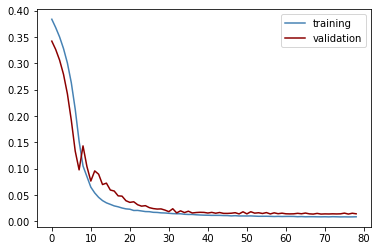

In [45]:
plt.plot(fit.history['loss'], label = 'training', color = 'SteelBlue')
plt.plot(fit.history['val_loss'], label = 'validation', color = 'DarkRed')
plt.legend()
plt.show

The plot of training loss decreases to a point of stability.  
The plot of validation loss decreases to a point of stability and has a small gap with the training loss.

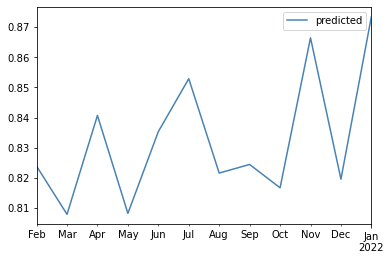

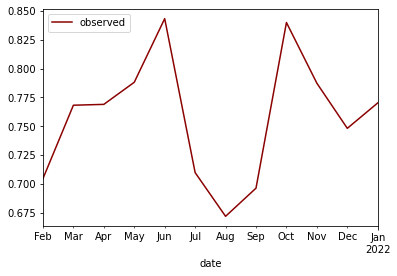

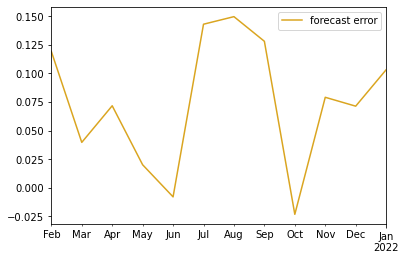

In [46]:
predicted = pd.DataFrame(yhat.T, index=pd.date_range('02/01/2021',periods=12,freq='M'))
predicted.columns = ['predicted']

predicted.plot(color = 'SteelBlue')
plt.show()


observed = data.loc['2021-02-01':'2022-01-01', ['inf']]
observed.columns = ['observed']

observed.plot(color = 'DarkRed')
plt.show()

model_error = array(predicted) - array(observed)
model_error = pd.DataFrame(model_error, index=pd.date_range('02/01/2021',periods=12,freq='M'))
model_error.columns = ['forecast error']

model_error.plot(color = 'goldenrod')
plt.show()

In [ ]:
model_error.mean()

forecast error    0.098359
dtype: float64

In [ ]:
predicted.to_csv(r'C:\Users\lhwpo\Desktop\2022 spring\bigdata economics\project\predicted_v2.csv')

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;

Make the confidence interval for forecasting by using 50 iterations

In [ ]:
from tqdm import tqdm

In [ ]:
n = 50
results = []
for x in tqdm(range(0, n)):
    model = Sequential()
    model.add(LSTM(100, 
               activation = 'relu', 
               return_sequences = True, 
               input_shape = (n_steps_in, n_features)))
    model.add(LSTM(100,
               dropout = 0.4,
               recurrent_dropout = 0.4,
              activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(25, activation = 'relu'))
    model.add(Dense(n_steps_out))
    
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss = 'mse')
    
    fit = model.fit(X, 
          y, 
          validation_data = (valX, valy), 
          epochs = 800, 
          verbose = 0,
          callbacks = [es])
    
    yhat = model.predict(x_input, verbose = 0)
    results.append((yhat))

100%|██████████| 50/50 [20:33<00:00, 24.67s/it]


In [ ]:
iter_output = pd.DataFrame(np.concatenate(results)) #build data frame with results
iter_output.columns = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']
iter_output

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,0.830199,0.855213,0.837591,0.820490,0.816565,0.788051,0.832400,0.839060,0.861274,0.801708,0.776770,0.829805
1,0.740136,0.630187,0.676851,0.664259,0.701583,0.679736,0.668874,0.676721,0.698575,0.681317,0.666528,0.674777
2,0.901076,0.862113,0.848685,0.866043,0.890689,0.863672,0.908249,0.891212,0.799051,0.867837,0.842241,0.911584
3,0.837118,0.854391,0.781989,0.806728,0.853885,0.855432,0.825432,0.868910,0.812349,0.877931,0.871693,0.822550
4,0.900624,0.853357,0.884386,0.854439,0.884889,0.900265,0.887126,0.875040,0.882760,0.881160,0.853665,0.834968
5,0.898288,0.868316,0.933277,0.892659,0.909790,0.865157,0.897768,0.935645,0.934792,0.856620,0.886172,0.864206
6,0.817121,0.838991,0.853975,0.809181,0.834088,0.856568,0.822728,0.830705,0.829527,0.872787,0.777264,0.830697
7,0.958089,0.980643,1.011263,0.967706,0.915765,1.011859,0.992361,0.985941,0.980649,0.985886,0.924632,1.062984
8,0.903334,0.869698,0.948687,0.851241,0.932603,0.859581,0.785002,0.909436,1.006627,0.814696,0.932786,0.818641
9,0.883420,0.913734,0.948599,0.883796,0.860038,0.893944,0.900279,0.876862,0.891512,0.984596,1.010191,0.879675


Mean of 50 iterations

In [ ]:
mean_forecast = pd.DataFrame([iter_output['m1'].mean(),
                iter_output['m2'].mean(),
                iter_output['m3'].mean(),
                iter_output['m4'].mean(),
                iter_output['m5'].mean(),
                iter_output['m6'].mean(),
                iter_output['m7'].mean(),
                iter_output['m8'].mean(),
                iter_output['m9'].mean(),
                iter_output['m10'].mean(),
                iter_output['m11'].mean(),
                iter_output['m12'].mean()], index=pd.date_range('02/01/2021',periods=12,freq='M')) #mean dataframe
mean_forecast.columns = ['predicted']
mean_forecast

,predicted
2021-02-28,0.858177
2021-03-31,0.863768
2021-04-30,0.870865
2021-05-31,0.858266
2021-06-30,0.872208
2021-07-31,0.878450
2021-08-31,0.868005
2021-09-30,0.866980
2021-10-31,0.870985
2021-11-30,0.871698


In [ ]:
se_forecast = pd.DataFrame([iter_output['m1'].std(),
                iter_output['m2'].std(),
                iter_output['m3'].std(),
                iter_output['m4'].std(),
                iter_output['m5'].std(),
                iter_output['m6'].std(),
                iter_output['m7'].std(),
                iter_output['m8'].std(),
                iter_output['m9'].std(),
                iter_output['m10'].std(),
                iter_output['m11'].std(),
                iter_output['m12'].std()], index=pd.date_range('02/01/2021',periods=12,freq='M')) #se daaframe
se_forecast.columns = ['predicted']
se_forecast

,predicted
2021-02-28,0.095272
2021-03-31,0.089020
2021-04-30,0.105614
2021-05-31,0.091048
2021-06-30,0.082391
2021-07-31,0.111762
2021-08-31,0.103235
2021-09-30,0.116411
2021-10-31,0.092496
2021-11-30,0.100895


In [ ]:
upper_bound = mean_forecast + 2*se_forecast 
lower_bound = mean_forecast - 2*se_forecast 

<function matplotlib.pyplot.show(close=None, block=None)>

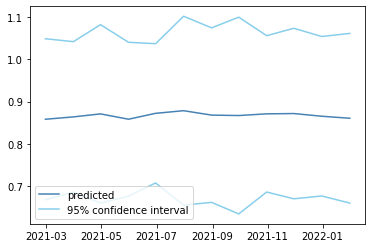

In [ ]:
plt.plot(mean_forecast, label = 'predicted', color = 'SteelBlue')
plt.plot(upper_bound, label = '95% confidence interval', color = 'SkyBlue')
plt.plot(lower_bound, color = 'SkyBlue')
plt.legend()
plt.show

In [ ]:
observed

,observed
date,
2021-02-01,0.704700
2021-03-01,0.768290
2021-04-01,0.769033
2021-05-01,0.788175
2021-06-01,0.843323
2021-07-01,0.709911
2021-08-01,0.672017
2021-09-01,0.696421
2021-10-01,0.839970


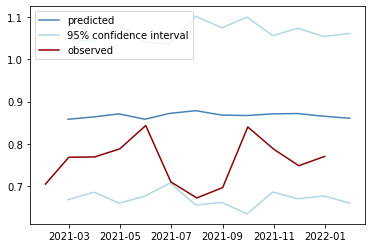

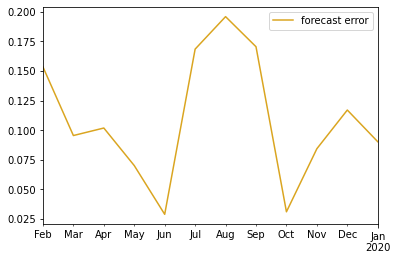

(forecast error    0.108959
 dtype: float64,
 predicted    0.867105
 dtype: float64)

In [ ]:
plt.plot(mean_forecast, label = 'predicted', color = 'SteelBlue')
plt.plot(upper_bound, label = '95% confidence interval', color = 'lightblue')
plt.plot(lower_bound, color = 'lightblue')
plt.plot(observed, label = 'observed', color = 'DarkRed')
plt.legend()
plt.show

model_error = array(mean_forecast) - array(observed)
model_error = pd.DataFrame(model_error, index=pd.date_range('02/01/2019',periods=12,freq='M'))
model_error.columns = ['forecast error']

model_error.plot(color = 'goldenrod')
plt.show()

model_error.mean(), mean_forecast.mean()

## Conclusion 

In this study, the inflation rate is forecasted depending on the different explanatory variables: Federal Fund Rate, unemployment, M1 supply, M2 supply, 3 months treasury bill, WTI-Oil price, real effective exchange rate, producer price index, home price index, employee hourly wage.

Based on the estimation graph above, the predicted inflation rates are very close to the observed inflation rate and are located in the intervals of 95% confidential. Reducing both overfitting and underfitting is essential for this model.


## Reference

- Kinsley and Kukiela, "Neural Networks from Scratch in Python"
- https://github.com/asaenzg/mscthesis/blob/master/Models/model.keras_neural_network%20.ipynb

- Urrutia, Mary Rose, G., Herrera, H., & Nicolas, M. O. (2021). An analysis on forecasting inflation rate in the Philippines: a recurrent neural network method approach. Turkish Journal of Computer and Mathematics Education, 12(3), 5297–5310. https://doi.org/10.17762/turcomat.v12i3.2165

- A., V., V., & Krishna, M. (2017). Forecasting Inflation Rate of India using Neural Networks. International Journal of Computer Applications, 158(5), 45–48. https://doi.org/10.5120/ijca2017912866

- Haider, & Hanif, M. N. (2009). INFLATION FORECASTING IN PAKISTAN USING ARTIFICIAL NEURAL NETWORKS. Pakistan Economic and Social Review, 47(1), 123–138.

- Pancrazi, & Vukotić, M. (2019). Inflation Sensitivity To Monetary Policy: What Has Changed since the Early 1980s? Oxford Bulletin of Economics and Statistics, 81(2), 412–436. https://doi.org/10.1111/obes.12272




